In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#np.set_printoptions(threshold=sys.maxsize)

2022-12-20 00:18:51.916455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 00:18:52.010591: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-20 00:18:52.033524: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-20 00:18:52.434371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'lite_edge'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
Model = model.Model(config_path)
DataProcessing = dataset.DataProcessing(input_shape_img=Model.cfg["INPUT_SHAPE_IMG"],
                                        output_shape=Model.cfg["OUTPUT_SHAPE"],
                                        config_path=config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

2022-12-20 00:18:53.591173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 00:18:53.595811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 00:18:53.595919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 00:18:53.596584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Load Dataset, Preprocess Images and Dataset

In [3]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

img_only_ds, img_count_img_only_ds = DataProcessing.load_dataset(DataProcessing.key.img_only)

#if Model.train_model:
#    for inp, out in train_ds.take(1):
#        edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
#                                        batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
#                                        num_classes=DataProcessing.num_classes['edge'])

The TRAIN DS contains 869 images.
The TEST DS contains 109 images.
The IMG_ONLY DS contains 80 images.


# Define, Compile and Train Model

In [4]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.num_classes['edge'])
    # model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(),
                  metrics=Model.get_metrics(DataProcessing.num_classes['edge']))

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=train_ds,
                        callbacks=Model.get_callbacks(), verbose=1)

model = Model.get_best_model_from_checkpoints()

Epoch 1/60


2022-12-20 00:19:02.935836: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-20 00:19:03.649720: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


290/290 [==============================] - 47s 137ms/step - loss: 2382.0076 - accuracy: 0.8624 - accuracy_1: 0.8624 - f1: 0.4169 - precision: 0.3044 - recall: 0.7281 - f1_1: 0.4169 - precision_1: 0.3044 - recall_1: 0.7281 - val_loss: 17524.4746 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 2/60
290/290 [==============================] - 38s 130ms/step - loss: 1291.2894 - accuracy: 0.9641 - accuracy_1: 0.9641 - f1: 0.6736 - precision: 0.6607 - recall: 0.6873 - f1_1: 0.6736 - precision_1: 0.6607 - recall_1: 0.6873 - val_loss: 28400.0117 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 3/60
290/290 [==============================] - 38s 131ms/step - loss: 1190.0972 - accuracy: 0.9665 - accuracy_1: 0.9665 - f1: 0.7016 - p

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=57028.73-epoch=10.00-f1=0.1018/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=57028.73-epoch=10.00-f1=0.1018/assets


290/290 [==============================] - 58s 200ms/step - loss: 932.8702 - accuracy: 0.9749 - accuracy_1: 0.9749 - f1: 0.7724 - precision: 0.7472 - recall: 0.7994 - f1_1: 0.7724 - precision_1: 0.7472 - recall_1: 0.7994 - val_loss: 57028.7344 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 11/60
290/290 [==============================] - 37s 126ms/step - loss: 944.5681 - accuracy: 0.9740 - accuracy_1: 0.9740 - f1: 0.7732 - precision: 0.7483 - recall: 0.8000 - f1_1: 0.7732 - precision_1: 0.7483 - recall_1: 0.8000 - val_loss: 55453.9922 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 12/60
290/290 [==============================] - 37s 126ms/step - loss: 924.5131 - accuracy: 0.9731 - accuracy_1: 0.9731 - f1: 0.7597 - pr

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=71867.68-epoch=20.00-f1=0.1018/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=71867.68-epoch=20.00-f1=0.1018/assets


290/290 [==============================] - 52s 180ms/step - loss: 813.5043 - accuracy: 0.9775 - accuracy_1: 0.9775 - f1: 0.7959 - precision: 0.7685 - recall: 0.8255 - f1_1: 0.7959 - precision_1: 0.7685 - recall_1: 0.8255 - val_loss: 71867.6797 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 21/60
290/290 [==============================] - 47s 163ms/step - loss: 813.5078 - accuracy: 0.9778 - accuracy_1: 0.9778 - f1: 0.7891 - precision: 0.7626 - recall: 0.8177 - f1_1: 0.7891 - precision_1: 0.7626 - recall_1: 0.8177 - val_loss: 73759.1953 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 22/60
290/290 [==============================] - 37s 128ms/step - loss: 795.0690 - accuracy: 0.9781 - accuracy_1: 0.9781 - f1: 0.8031 - pr

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=80564.01-epoch=30.00-f1=0.1018/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=80564.01-epoch=30.00-f1=0.1018/assets


290/290 [==============================] - 53s 183ms/step - loss: 744.7001 - accuracy: 0.9796 - accuracy_1: 0.9796 - f1: 0.8169 - precision: 0.7863 - recall: 0.8501 - f1_1: 0.8169 - precision_1: 0.7863 - recall_1: 0.8501 - val_loss: 80564.0078 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 31/60
290/290 [==============================] - 41s 140ms/step - loss: 739.2567 - accuracy: 0.9782 - accuracy_1: 0.9782 - f1: 0.8078 - precision: 0.7841 - recall: 0.8335 - f1_1: 0.8078 - precision_1: 0.7841 - recall_1: 0.8335 - val_loss: 83145.8672 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 32/60
290/290 [==============================] - 40s 137ms/step - loss: 726.0578 - accuracy: 0.9804 - accuracy_1: 0.9804 - f1: 0.8142 - pr

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=94181.27-epoch=40.00-f1=0.1018/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=94181.27-epoch=40.00-f1=0.1018/assets


290/290 [==============================] - 53s 182ms/step - loss: 663.1752 - accuracy: 0.9805 - accuracy_1: 0.9805 - f1: 0.8286 - precision: 0.7959 - recall: 0.8642 - f1_1: 0.8286 - precision_1: 0.7959 - recall_1: 0.8642 - val_loss: 94181.2656 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 41/60
290/290 [==============================] - 37s 126ms/step - loss: 683.4751 - accuracy: 0.9815 - accuracy_1: 0.9815 - f1: 0.8273 - precision: 0.7994 - recall: 0.8573 - f1_1: 0.8273 - precision_1: 0.7994 - recall_1: 0.8573 - val_loss: 95598.5625 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 42/60
290/290 [==============================] - 43s 150ms/step - loss: 668.8718 - accuracy: 0.9804 - accuracy_1: 0.9804 - f1: 0.8273 - pr

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=105860.98-epoch=50.00-f1=0.1018/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=105860.98-epoch=50.00-f1=0.1018/assets


290/290 [==============================] - 51s 178ms/step - loss: 614.9466 - accuracy: 0.9814 - accuracy_1: 0.9814 - f1: 0.8404 - precision: 0.8052 - recall: 0.8789 - f1_1: 0.8404 - precision_1: 0.8052 - recall_1: 0.8789 - val_loss: 105860.9766 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 51/60
290/290 [==============================] - 42s 145ms/step - loss: 629.1739 - accuracy: 0.9821 - accuracy_1: 0.9821 - f1: 0.8354 - precision: 0.8030 - recall: 0.8705 - f1_1: 0.8354 - precision_1: 0.8030 - recall_1: 0.8705 - val_loss: 105447.6250 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
Epoch 52/60
290/290 [==============================] - 41s 140ms/step - loss: 630.8962 - accuracy: 0.9809 - accuracy_1: 0.9809 - f1: 0.8364 - 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=114948.32-epoch=60.00-f1=0.1018/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=114948.32-epoch=60.00-f1=0.1018/assets


290/290 [==============================] - 54s 188ms/step - loss: 583.5615 - accuracy: 0.9830 - accuracy_1: 0.9830 - f1: 0.8451 - precision: 0.8097 - recall: 0.8837 - f1_1: 0.8451 - precision_1: 0.8097 - recall_1: 0.8837 - val_loss: 114948.3203 - val_accuracy: 0.0536 - val_accuracy_1: 0.0536 - val_f1: 0.1018 - val_precision: 0.0536 - val_recall: 1.0000 - val_f1_1: 0.1018 - val_precision_1: 0.0536 - val_recall_1: 1.0000
/home/david/SemesterProject/Models/edge_detection/lite_edge/CKPT/ckpt-loss=80564.01-epoch=30.00-f1=0.1018


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/TFLITE/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/lite_edge/TFLITE/assets


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_img (InputLayer)            [(None, 640, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 base_model (Functional)        [(None, 160, 90, 24  2257984     ['in_img[0][0]']                 
                                ),                                                                
                                 (None, 80, 45, 32)                                               
                                , (None, 40, 23, 64                                               
                                ),                                                            

                                                                                                  
 batch_normalization (BatchNorm  (None, 20, 12, 20)  80          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 tf.image.resize_1 (TFOpLambda)  (None, 160, 90, 20)  0          ['batch_normalization[0][0]']    
                                                                                                  
 concatenate_1 (Concatenate)    (None, 160, 90, 44)  0           ['tf.image.resize_1[0][0]',      
                                                                  'base_model[0][0]']             
                                                                                                  
 separable_conv2d (SeparableCon  (None, 160, 90, 20)  1296       ['concatenate_1[0][0]']          
 v2D)     

                                                                                                  
 tf.image.resize_3 (TFOpLambda)  (None, 160, 90, 1)  0           ['batch_normalization_7[0][0]']  
                                                                                                  
 tf.image.resize_4 (TFOpLambda)  (None, 160, 90, 1)  0           ['batch_normalization_9[0][0]']  
                                                                                                  
 tf.image.resize_5 (TFOpLambda)  (None, 160, 90, 1)  0           ['batch_normalization_11[0][0]'] 
                                                                                                  
 tf.image.resize_6 (TFOpLambda)  (None, 160, 90, 1)  0           ['batch_normalization_13[0][0]'] 
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 160, 90, 1)  0           ['batch_normalization_3[0][0]']  
 ingOpLamb

# Plot Results

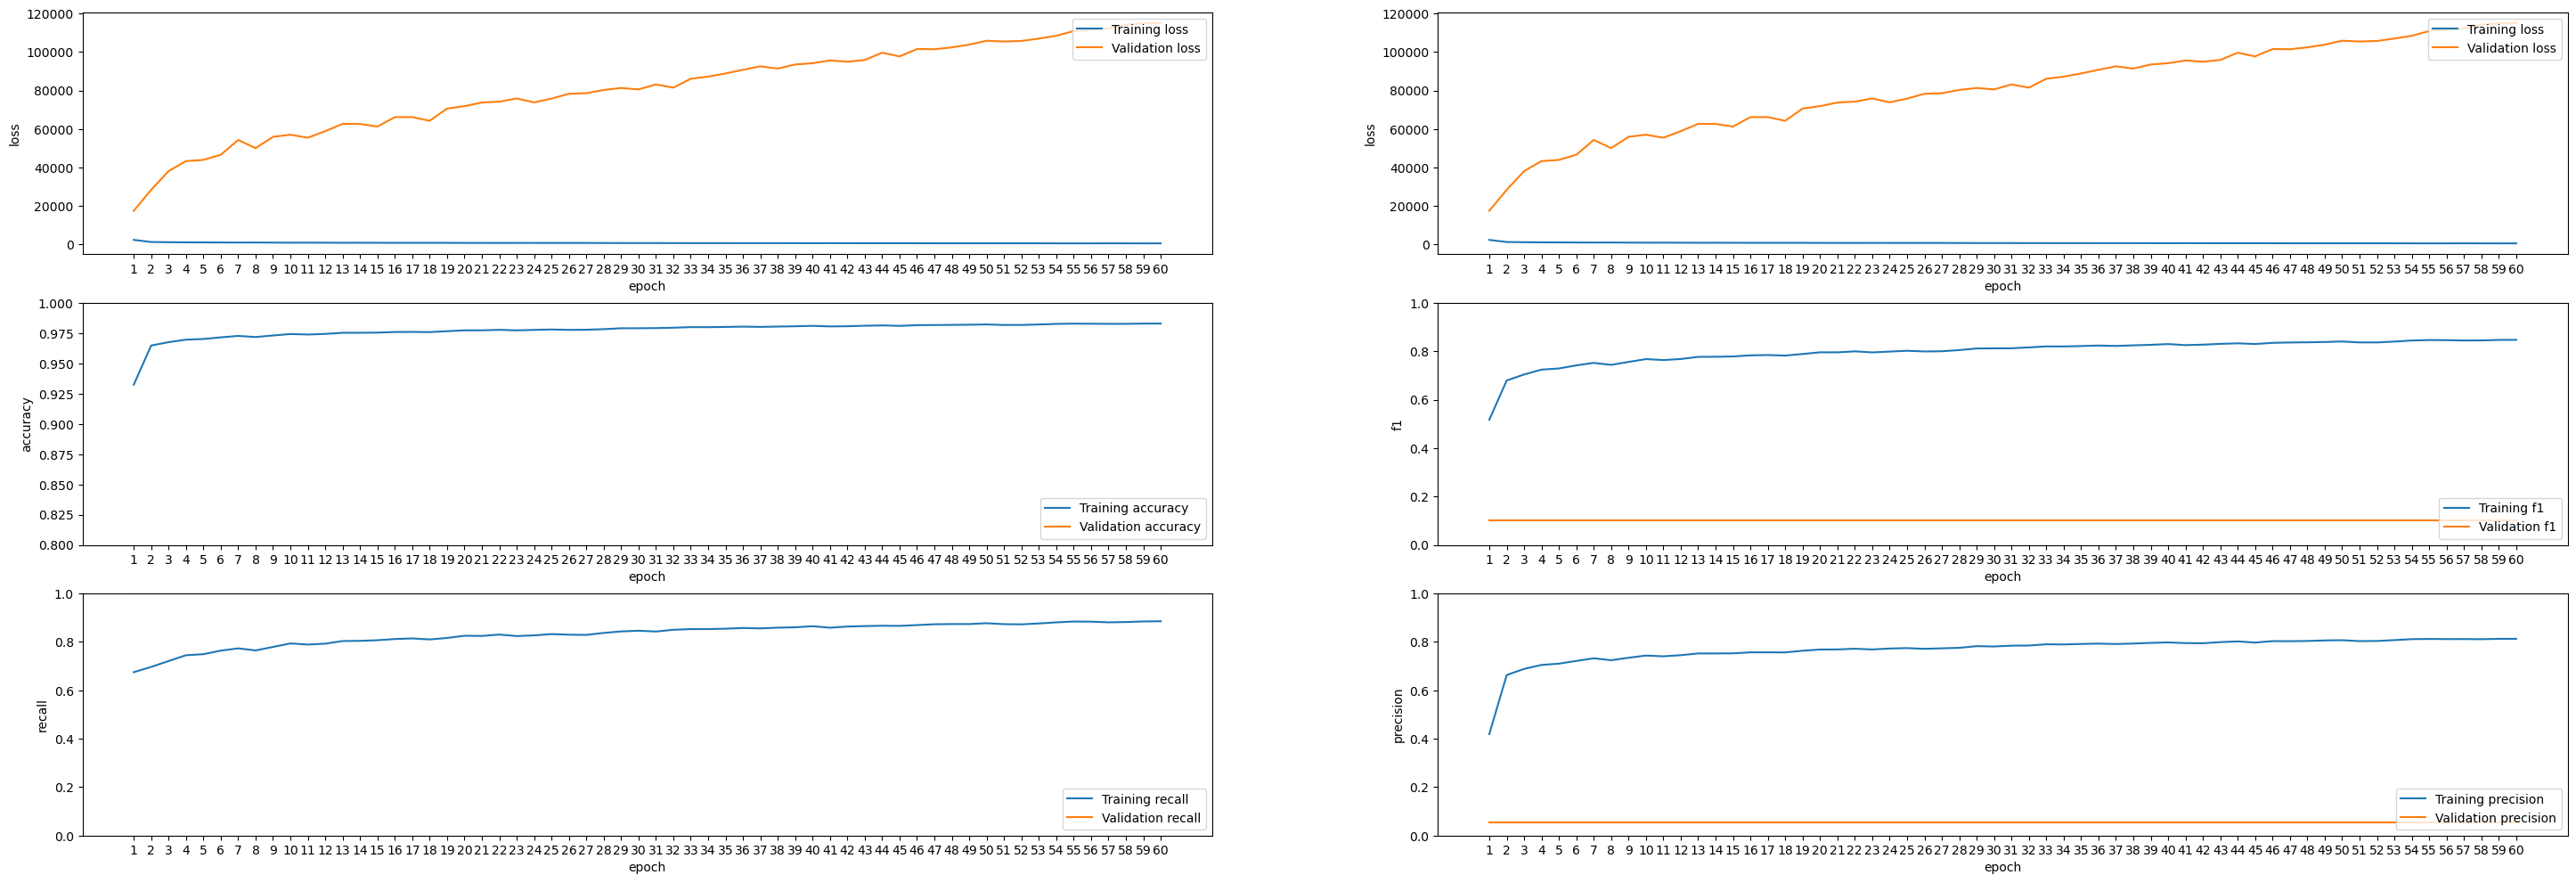

In [6]:
if Model.train_model:
    plot_losses = ["loss", "loss"]
    plot_metrics = ["accuracy", "f1", "recall", "precision"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training.svg")

    plots.plot_training_history(history=history.history, list_of_loss_names=plot_losses,
                                list_of_metric_names=plot_metrics,
                                save=Model.cfg["SAVE"], path=path)

1/1 [==============================] - 1s 666ms/step


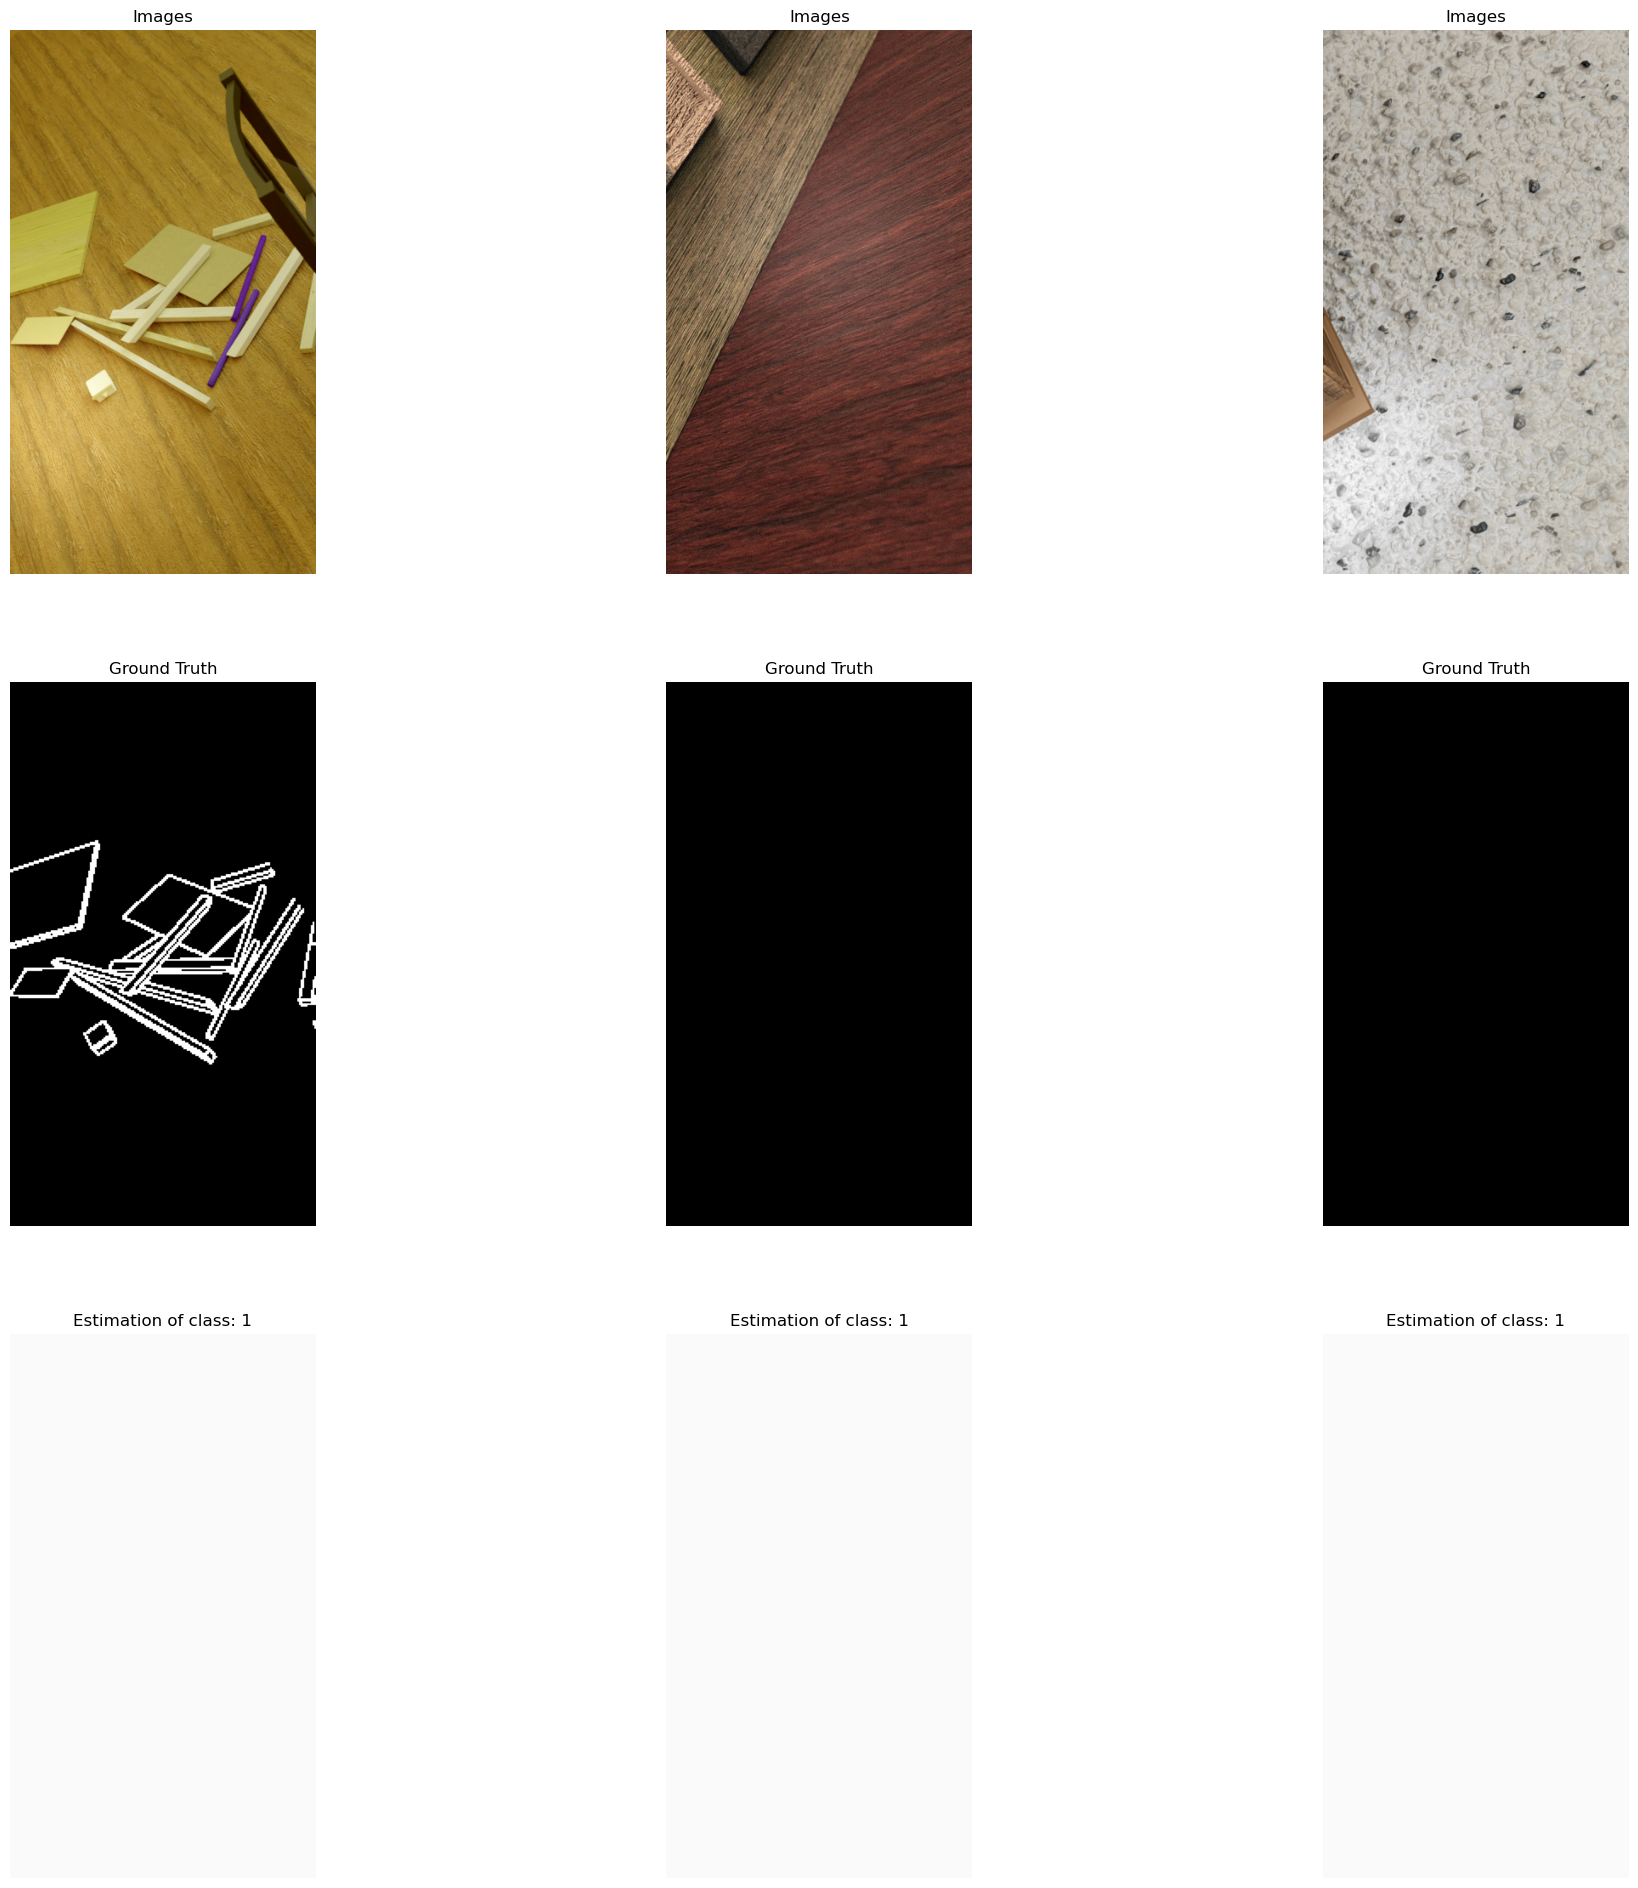

1/1 [==============================] - 0s 28ms/step


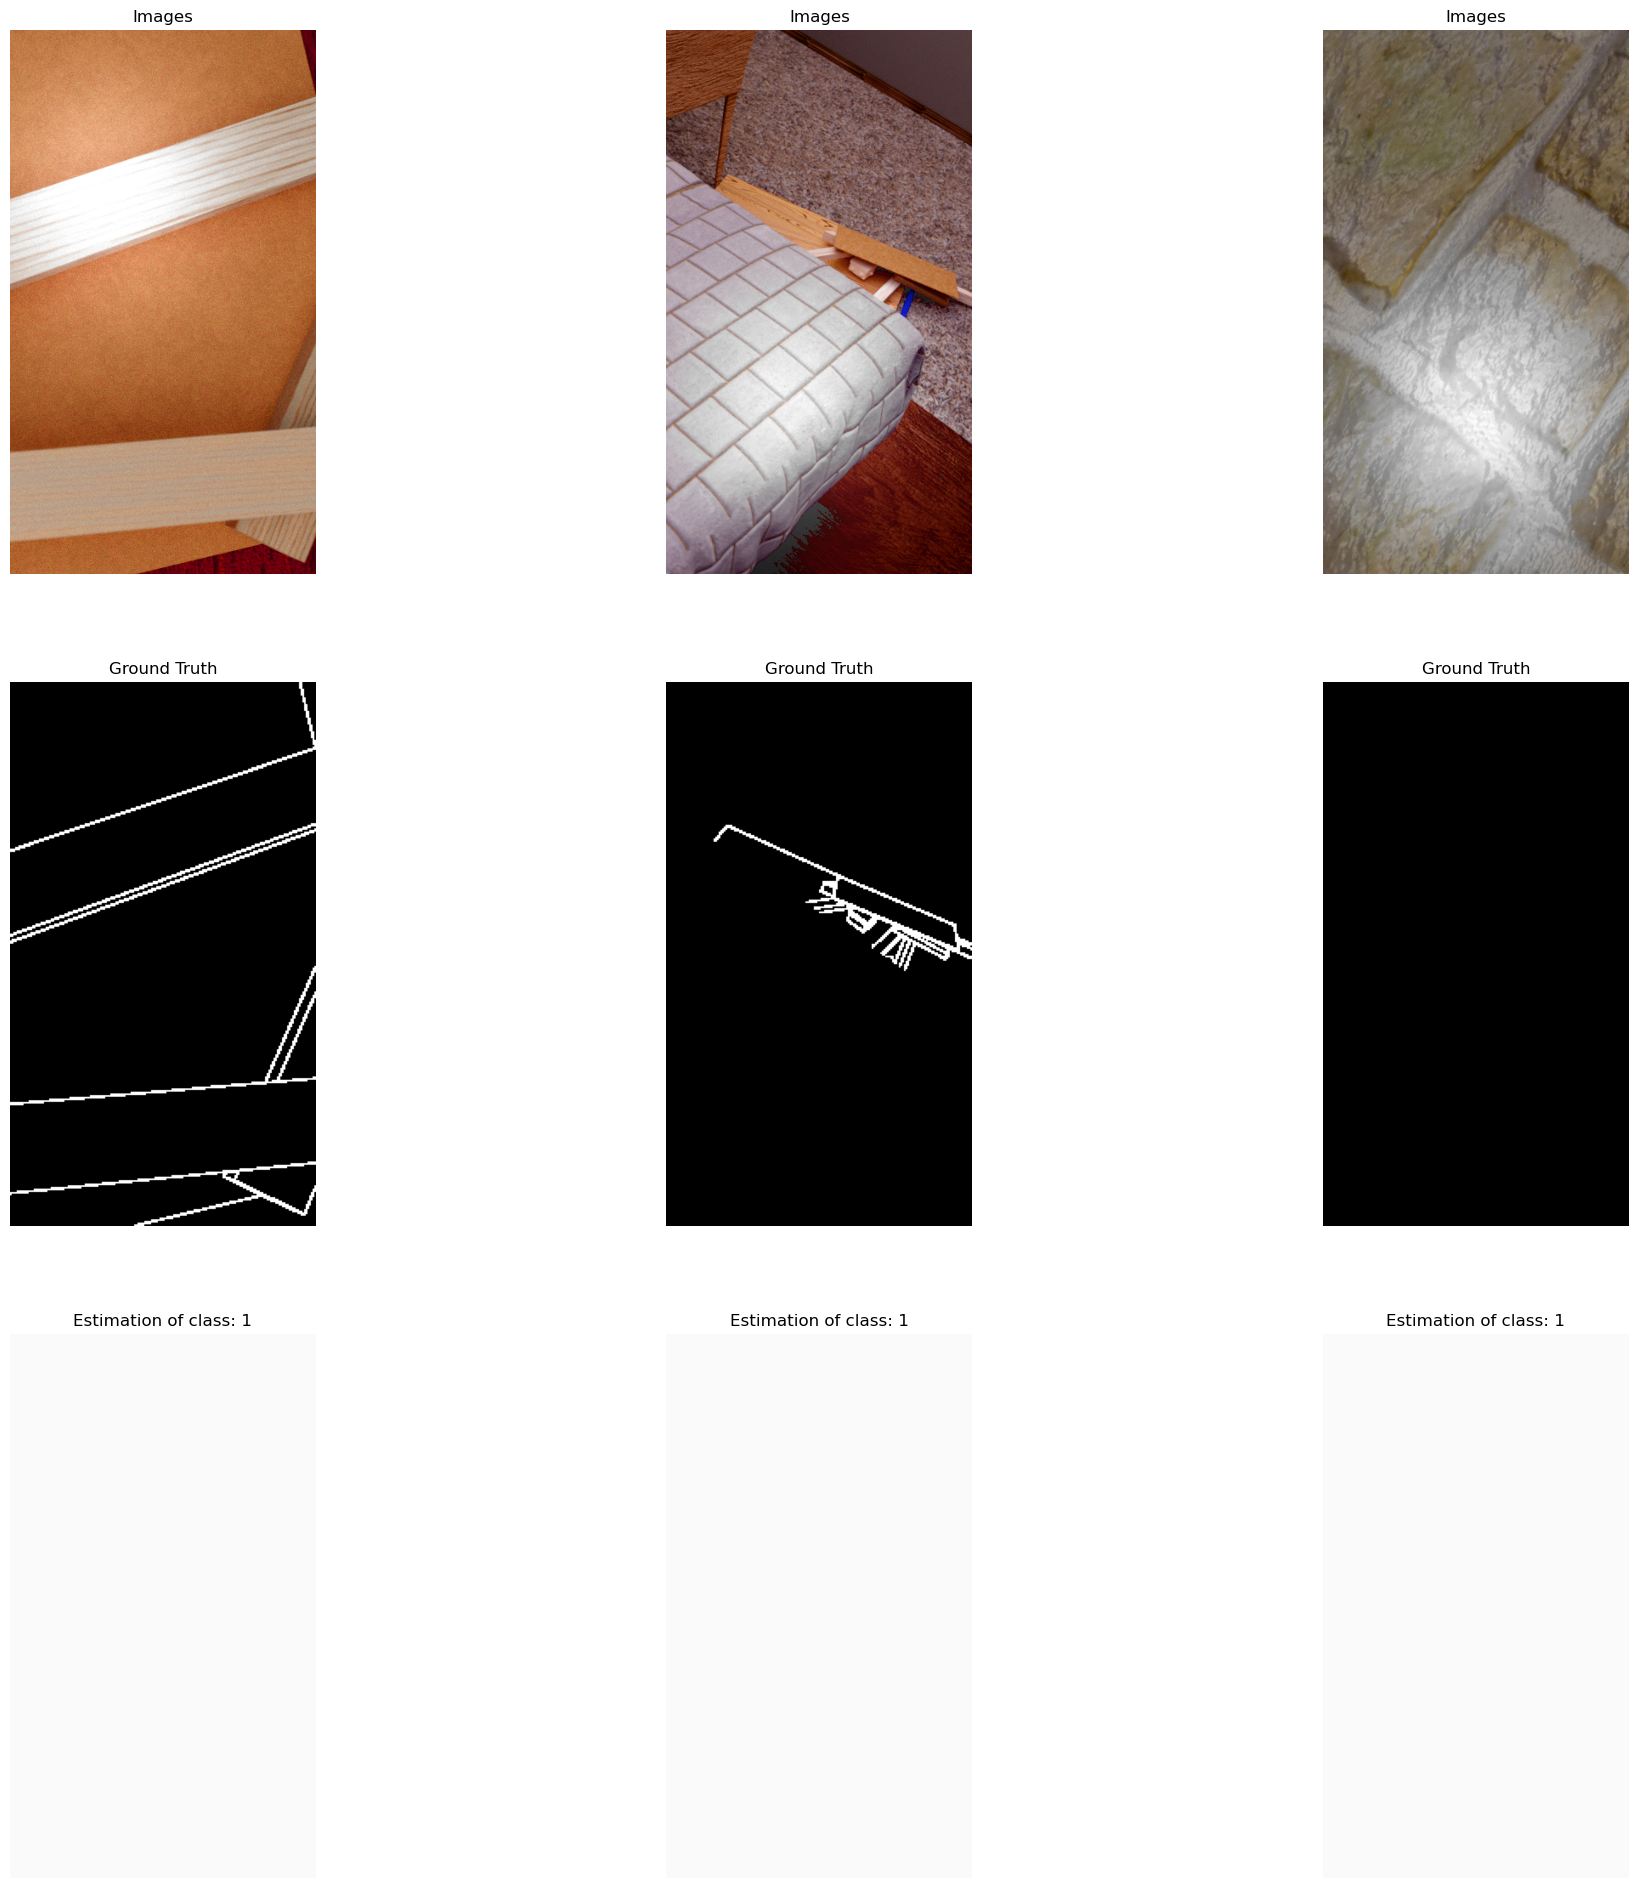

In [11]:
for inp, out in test_ds.take(2):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                                    predictions=pred,
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

1/1 [==============================] - 0s 28ms/step


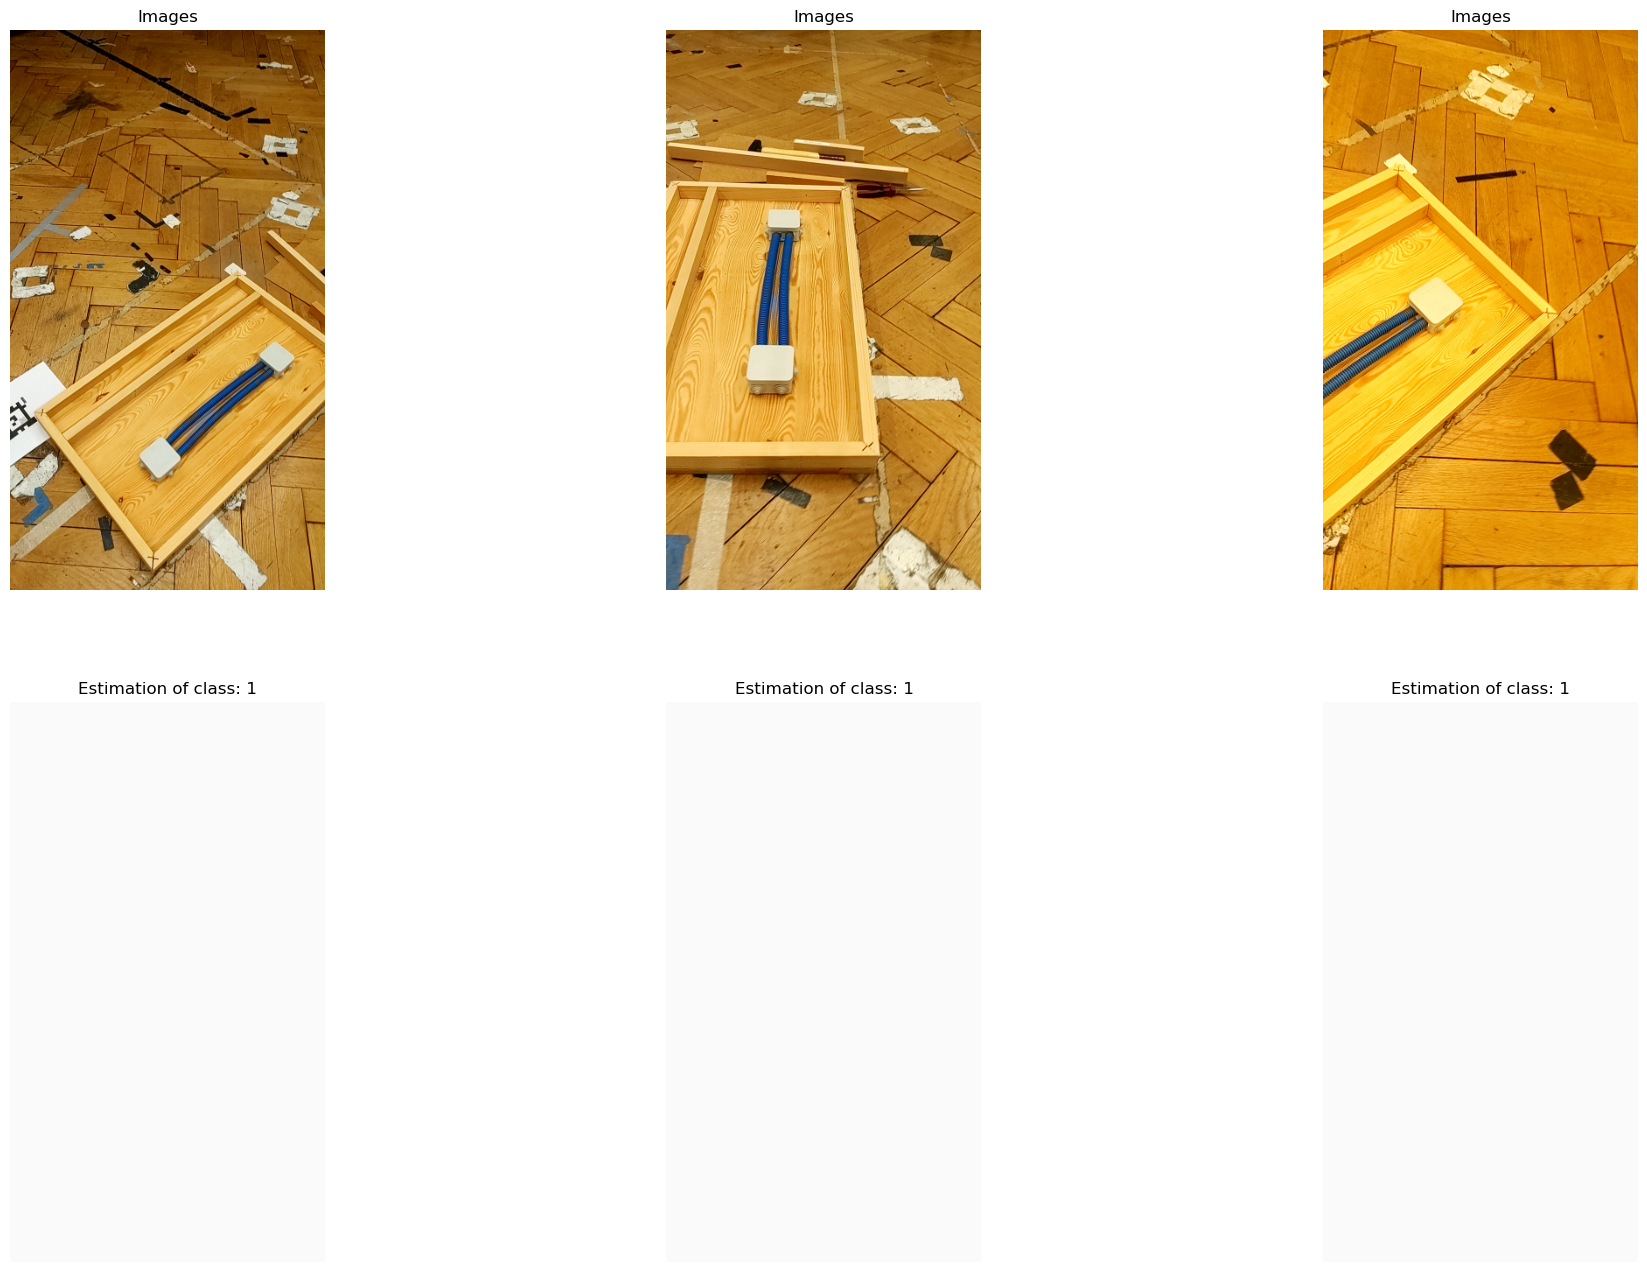

1/1 [==============================] - 0s 24ms/step


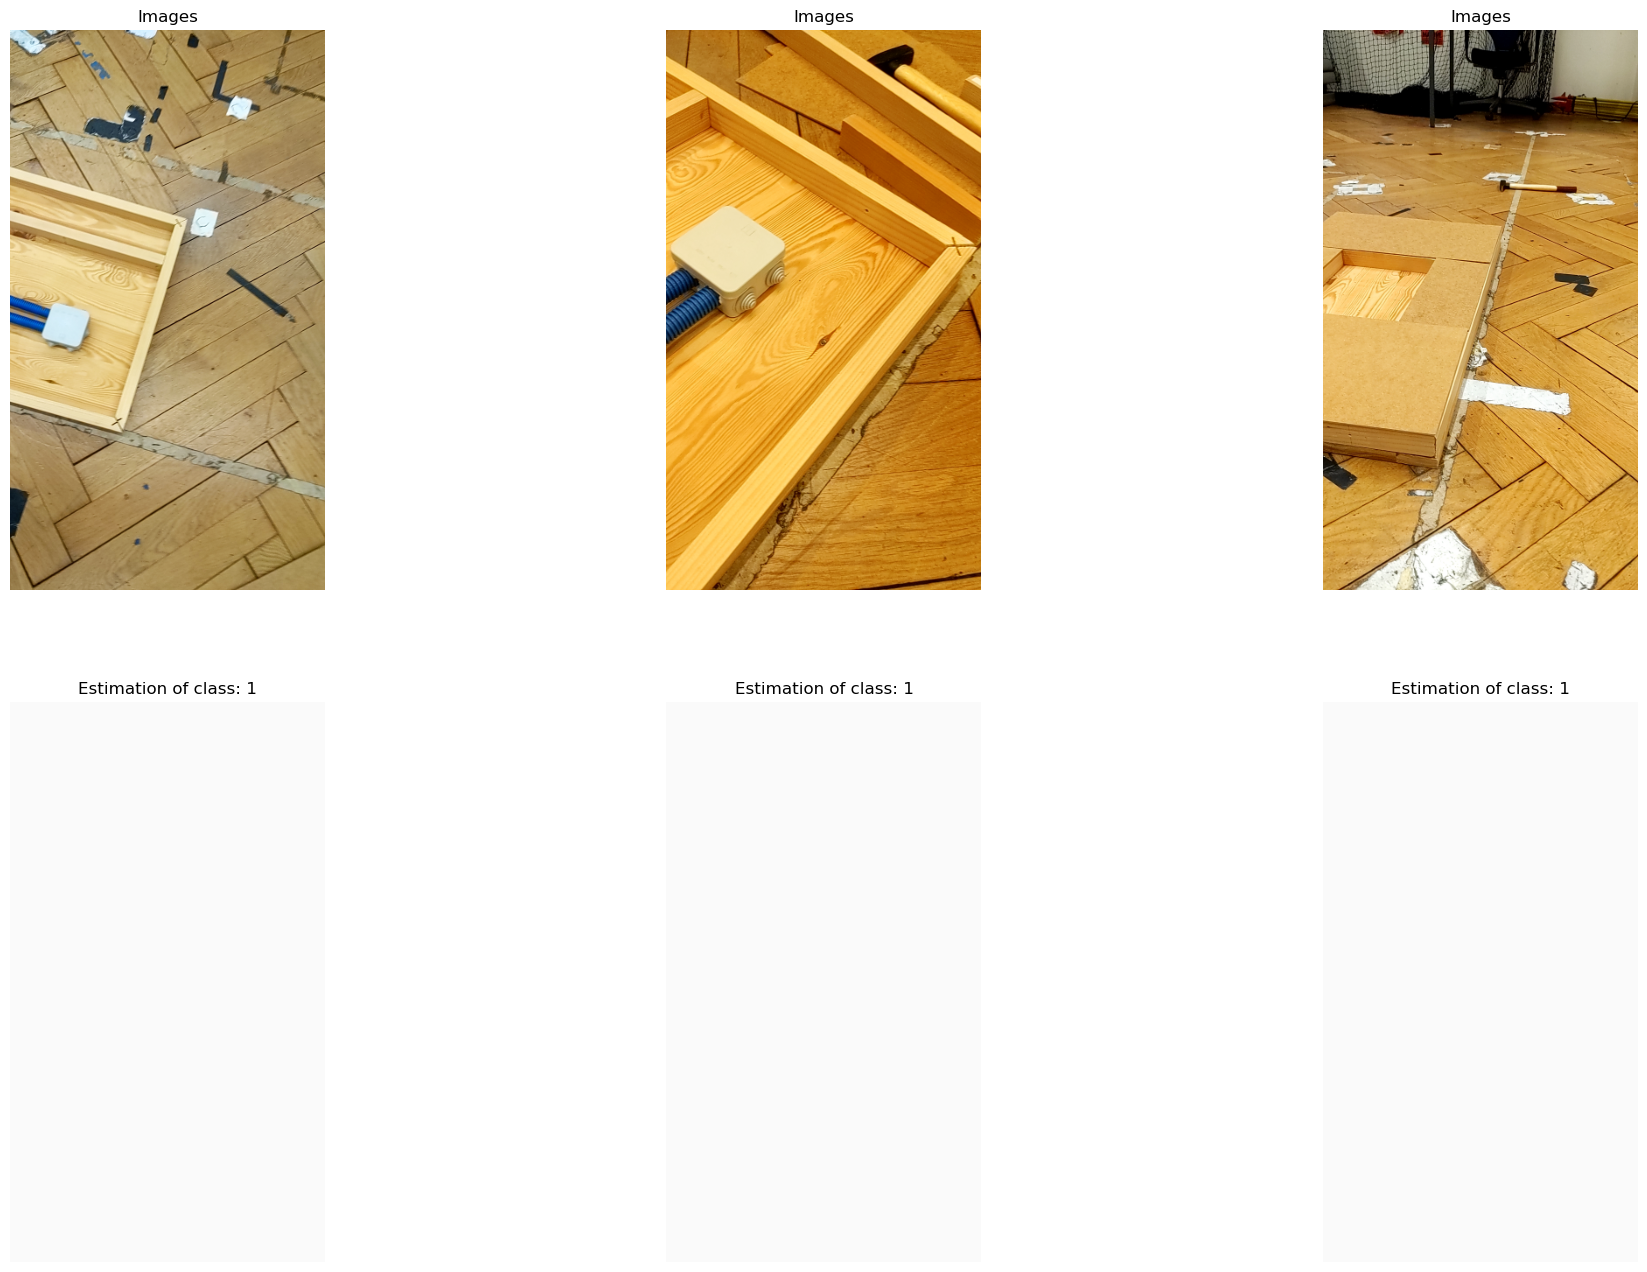

1/1 [==============================] - 0s 22ms/step


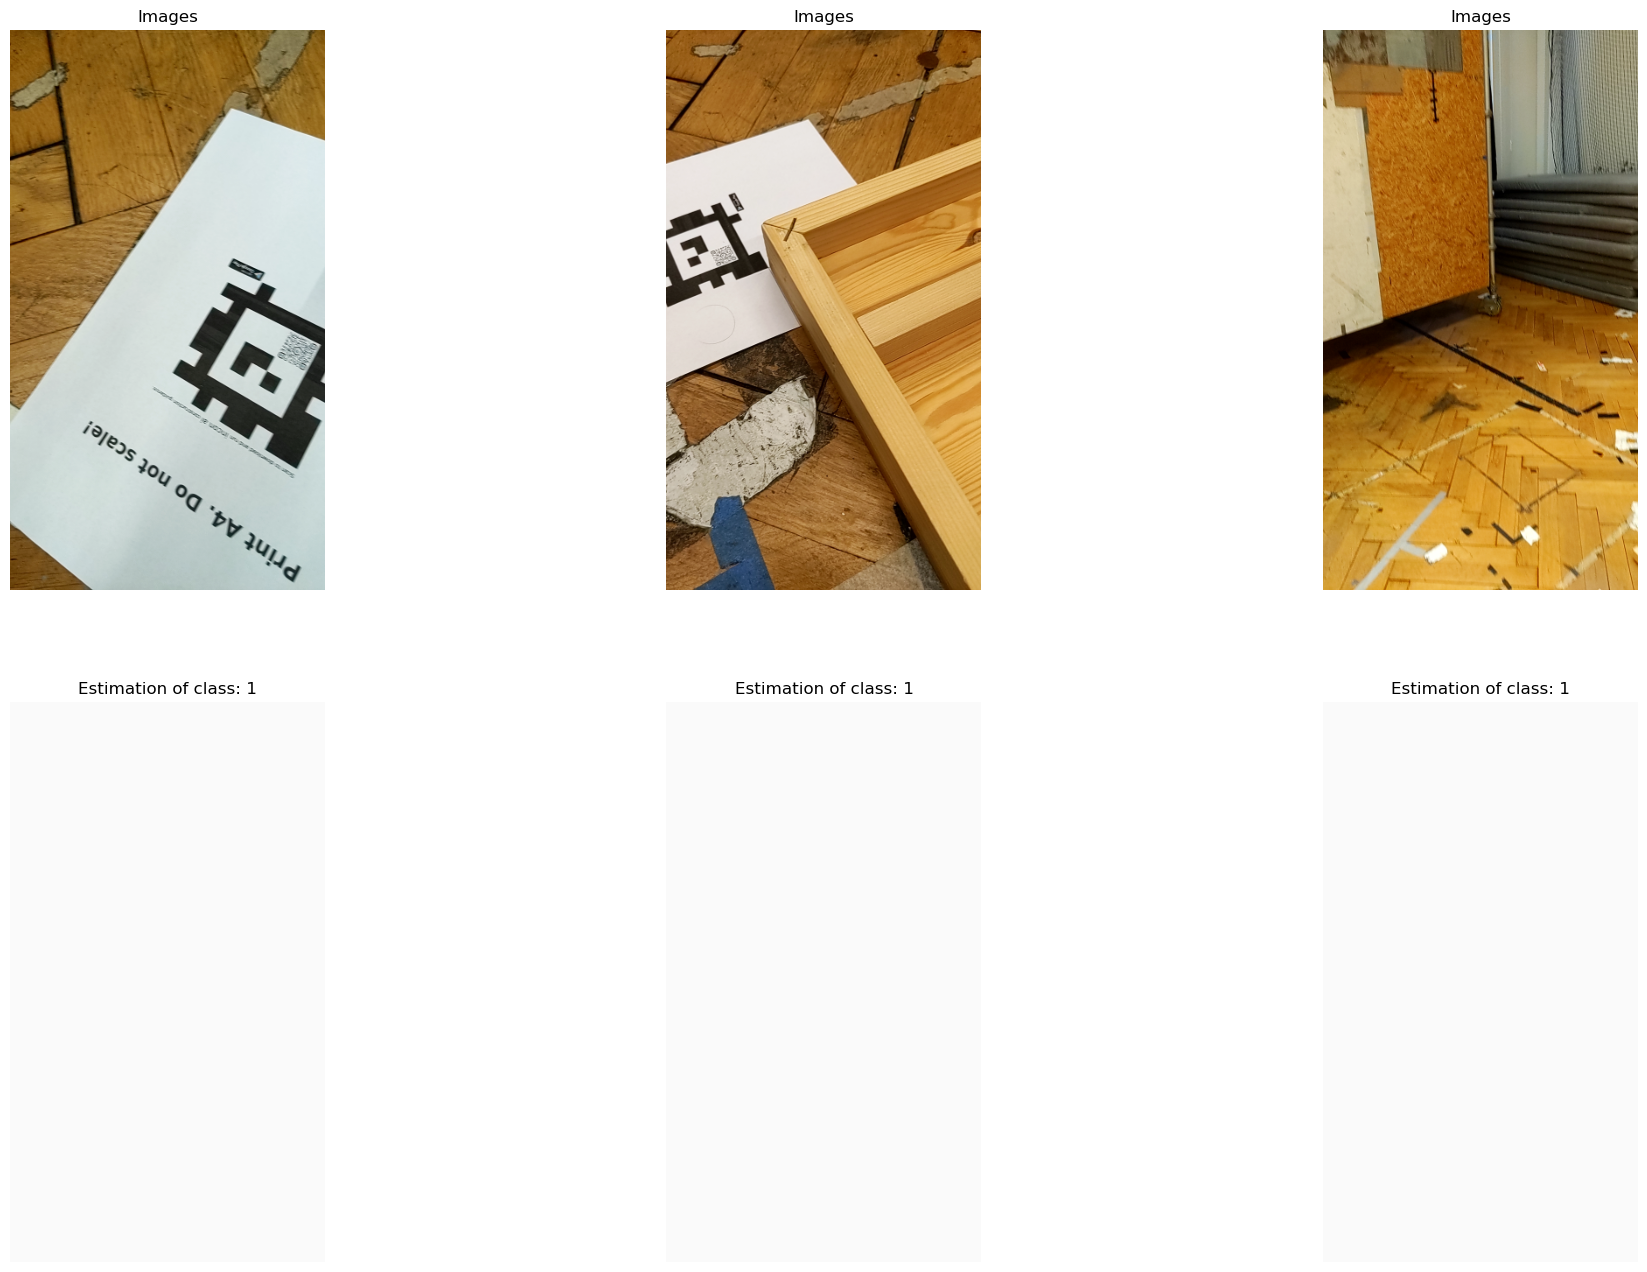

2022-12-20 08:10:57.743341: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [12]:
for inp, out in img_only_ds.take(3):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    predictions=pred,
                                    batch_size=DataProcessing.cfg['IMG_ONLY']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

Max Accuracy Score = 0.053 at 0.100
MF1 = 0.101
MF1_1 = 0.101, ODS_1 = 0.100


[0.1]

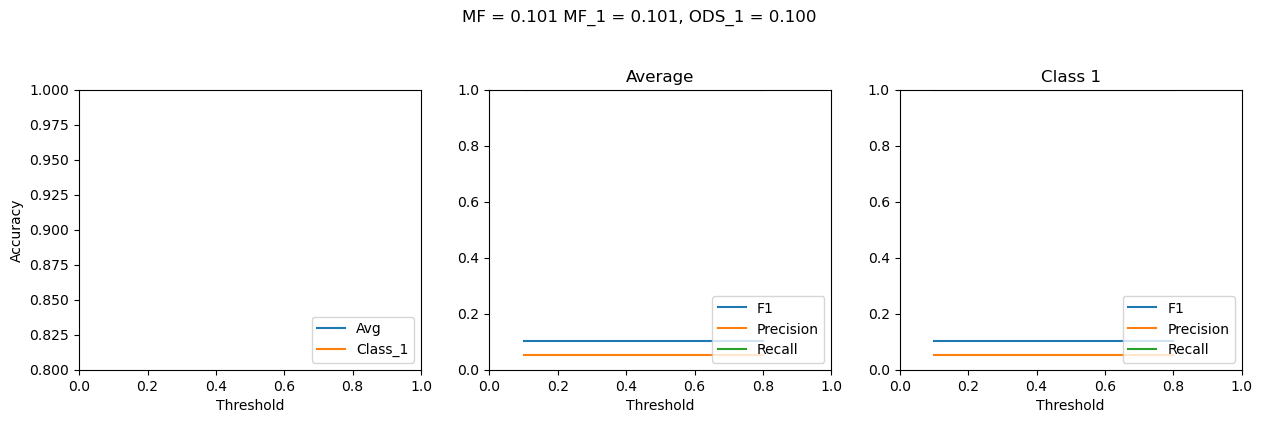

In [9]:
### Maximum F1 Score:
path_metrics_evaluation_plot = os.path.join(Model.Data.paths["FIGURES"],
                                            "threshold_metrics_evaluation_test_ds.svg")

edge_detection_plots.plot_threshold_metrics_evaluation(model=model, ds=test_ds,
                                                       num_classes=DataProcessing.num_classes['edge'],
                                                       classes_displayed_individually=True,
                                                       save=Model.cfg["SAVE"],
                                                       path=path_metrics_evaluation_plot,
                                                       accuracy_y_lim_min=0.8)


In [10]:
if Model.cfg["CONVERT_TO_TFLITE"]:
    Model.convert_model_to_tflite(model)

2022-12-20 01:01:35.767898: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-20 01:01:35.767926: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-20 01:01:35.768424: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /home/david/SemesterProject/Models/edge_detection/lite_edge/TFLITE
2022-12-20 01:01:35.802813: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-20 01:01:35.802845: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /home/david/SemesterProject/Models/edge_detection/lite_edge/TFLITE
2022-12-20 01:01:35.895019: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-12-20 01:01:35.932363: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-20 01:01:36.883399: I tensorflow/cc/saved_m

=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the DEQUANTIZE op takes
tensor #19 as input and produces tensor #243 as output.

Subgraph#0 main(T#0) -> [T#640]
  Op#0 DEQUANTIZE(T#19[]) -> [T#243]
  Op#1 DEQUANTIZE(T#20[]) -> [T#244]
  Op#2 DEQUANTIZE(T#21[]) -> [T#245]
  Op#3 DEQUANTIZE(T#22[]) -> [T#246]
  Op#4 DEQUANTIZE(T#23[]) -> [T#247]
  Op#5 DEQUANTIZE(T#24[]) -> [T#248]
  Op#6 DEQUANTIZE(T#25[]) -> [T#249]
  Op#7 DEQUANTIZE(T#26[]) -> [T#250]
  Op#8 DEQUANTIZE(T#27[]) -> [T#251]
  Op#9 DEQUANTIZE(T#28[]) -> [T#252]
  Op#10 DEQUANTIZE(T#29[]) -> [T#253]
  Op#11 DEQUANTIZE(T#30[]) -> [T#254]
  Op#12 DEQUANTIZE(T#31[]) -> [T#255]
  Op#13 DEQUANTIZE(T#32[]) -> [T#256]
  Op#14 DEQUANTIZE(T#33[]) -> [T#257]
  Op#15 DEQUANTIZE(T#34[]) -> [T#258]
  Op#16 DEQUANTIZE(T#35[]) -> [T#259]
  Op#17 DEQUANTIZE(T#36[]) -> [T#260]
  Op#18 DEQUANTIZE(T#37[]) -> [T#261]
  Op#19 D

In [16]:
tf.keras.applications.MobileNetV2(alpha=0.35).summary()

Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 48)   0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 48)   0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 48)  432         ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 48)  192         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 144)  3456        ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 144)  576        ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 144)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 144)  1296       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 144)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 32)   4608        ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 32)  128         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 192)  6144        ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 336)   3024        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 336)   1344        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 336)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 56)     18816       ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_